# Load Data

In [1]:
import pickle
read=open("flowerdata.pickle","rb")
x=pickle.load(read)
read_label=open("flower_label.pickle","rb")
y=pickle.load(read_label)

In [2]:
import numpy as num
import os

In [4]:
import tensorflow as tf

In [5]:
tf.config.list_physical_devices('CPU')[0]

PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')

In [6]:
x=num.asarray(x,dtype="float64")

In [7]:
x.dtype

dtype('float64')

In [8]:
y.dtype

dtype('int32')

# Scaling

In [9]:
x=x/255.0

In [10]:
x

array([[[[0.21176471, 0.01176471, 0.        ],
         [0.38823529, 0.16862745, 0.10980392],
         [0.65882353, 0.41176471, 0.25098039],
         ...,
         [0.88235294, 0.89019608, 0.98039216],
         [0.8627451 , 0.87058824, 0.95294118],
         [0.85098039, 0.85882353, 0.94117647]],

        [[0.23529412, 0.02745098, 0.01176471],
         [0.37647059, 0.15686275, 0.09019608],
         [0.60784314, 0.36078431, 0.2       ],
         ...,
         [0.88627451, 0.89411765, 0.98431373],
         [0.8627451 , 0.87058824, 0.96078431],
         [0.85098039, 0.85882353, 0.94117647]],

        [[0.25882353, 0.04705882, 0.00784314],
         [0.35294118, 0.12941176, 0.05490196],
         [0.50980392, 0.26666667, 0.11372549],
         ...,
         [0.89019608, 0.89803922, 0.99607843],
         [0.87058824, 0.87843137, 0.97647059],
         [0.85882353, 0.86666667, 0.95686275]],

        ...,

        [[0.43137255, 0.36078431, 0.07058824],
         [0.43921569, 0.38823529, 0.07843137]

In [11]:
y.shape

(3297,)

In [12]:
y_n=y.reshape(-1,1)

In [13]:
y_n.shape

(3297, 1)

# Stratified Shuffle Split To Order the Data

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=0)

In [15]:
x_train=[]
x_test=[]
y_train=[]
y_test=[]
for train_index,test_index in split.split(x,y_n):
    x_train,x_test=x[train_index],x[test_index]
    y_train,y_test=y_n[train_index],y_n[test_index]
    

# Model Building

In [16]:

import matplotlib.pyplot as plt
import cv2
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
import os
import seaborn as sns

# Conv Layers

In [17]:

activation = 'sigmoid'

model= Sequential()
model.add(Conv2D(32, 3, activation ='selu', padding = 'same', input_shape = (250, 250, 3)))
model.add(BatchNormalization())

model.add(Conv2D(32, 3, activation = 'selu', padding = 'same', kernel_initializer = 'he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(64, 3, activation ='selu', padding = 'same', kernel_initializer = 'he_uniform'))
model.add(BatchNormalization())

model.add(Conv2D(64, 3, activation ='selu', padding = 'same', kernel_initializer = 'he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Flatten())

In [18]:
feature_extract=model.output
feature_extract

<KerasTensor: shape=(None, 246016) dtype=float32 (created by layer 'flatten')>

# Adding Neural Nets

In [19]:
feature_extract=Dense(128,activation='selu',kernel_initializer='he_uniform')(feature_extract)
prediction_layer=Dense(1,activation='sigmoid')(feature_extract)
cnn_model=Model(inputs=model.input,outputs=prediction_layer)

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 250, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 250, 250, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 250, 250, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 250, 250, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 125, 125, 32)     0         
 )                                                               
                                                        

In [21]:
cnn_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 250, 250, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 250, 250, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 250, 250, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 250, 250, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 250, 250, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 125, 125, 32)     0     

In [22]:
cnn_model.compile(optimizer='adam',metrics=['accuracy'],loss="binary_crossentropy")

In [97]:
with tf.device('/cpu:0'):
    cnn_model.fit(x_train,y_train,validation_split=0.1,epochs=5,batch_size=1)

# Random Forest 

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [24]:
with tf.device('/cpu:0'):
    RF_in=model.predict(x_train)

In [25]:
RF_model=RandomForestClassifier(n_estimators=50,random_state=42)

In [26]:
RF_model.fit(RF_in,y_train)

<ipython-input-26-574c8dd075e7>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model.fit(RF_in,y_train)


RandomForestClassifier(n_estimators=50, random_state=42)

In [27]:
predicted=RF_model.predict(RF_in)

In [28]:
predicted=predicted.reshape(-1,1)
predicted.shape

(2637, 1)

In [29]:
with tf.device('/cpu:0'):
    RF_out=model.predict(x_test)
predicted_test=RF_model.predict(RF_out)
predicted_test.shape

(660,)

# Confusion Matrix

In [30]:
cm=confusion_matrix(predicted_test,y_test)

In [31]:
print("accuracy score:",590/660)

accuracy score: 0.8939393939393939


In [32]:
cm

array([[389,  54],
       [ 27, 190]], dtype=int64)

In [33]:
x_train.shape

(2637, 250, 250, 3)

In [34]:
y_train.shape

(2637, 1)

In [ ]:
#y_test

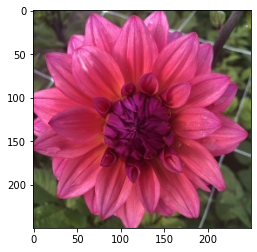

In [35]:
import matplotlib.pyplot as plt
plt.imshow(x[15])

In [36]:
y[15]

0

# MODEL 2

In [37]:
import tensorflow as tf

In [38]:
mobile=tf.keras.applications.MobileNet(
    input_shape=None,
    alpha=1.0,
    depth_multiplier=1,
    dropout=0.001,
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax"
)

In [39]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [40]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [41]:
sample=x[0]
import cv2

In [42]:
img_sh=cv2.resize(sample,(224,224))

In [43]:
img_sh.shape

(224, 224, 3)

# Resize the image for Mobile Net model

In [44]:
mobi_x_train=[]

In [45]:
for x in x_train:
    mobi_x_train.append(cv2.resize(x,(224,224)))

In [46]:
mobi_x_train=num.array(mobi_x_train)

In [47]:
print(mobi_x_train.shape)
print(len(mobile.layers))

(2637, 224, 224, 3)
91


# Customizing the model

In [48]:
custom_lay=mobile.layers[-7].output
dense_flat=Flatten()(custom_lay)
out_layer=Dense(1,activation="sigmoid")(dense_flat)

In [49]:
mobile_net_model=Model(inputs=mobile.input,outputs=out_layer)

In [50]:
mobile_net_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

In [51]:
for layers in mobile_net_model.layers[:-23]:
    layers.trainable=False    

In [52]:
mobile_net_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

In [53]:
mobile_net_model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [54]:
with tf.device('/cpu:0'):
    mobile_net_model.fit(mobi_x_train,y_train,epochs=5,validation_split=0.1,batch_size=35)

Epoch 1/5
68/68 [==============================] - 151s 2s/step - loss: 5.0936 - accuracy: 0.9486 - val_loss: 0.3935 - val_accuracy: 0.9924
Epoch 2/5
68/68 [==============================] - 135s 2s/step - loss: 0.1296 - accuracy: 0.9966 - val_loss: 0.3860 - val_accuracy: 0.9962
Epoch 3/5
68/68 [==============================] - 133s 2s/step - loss: 0.3443 - accuracy: 0.9933 - val_loss: 0.8501 - val_accuracy: 0.9924
Epoch 4/5
68/68 [==============================] - 133s 2s/step - loss: 0.0376 - accuracy: 0.9987 - val_loss: 2.8328e-08 - val_accuracy: 1.0000
Epoch 5/5
68/68 [==============================] - 131s 2s/step - loss: 0.0487 - accuracy: 0.9979 - val_loss: 0.2507 - val_accuracy: 0.9886


In [55]:
for layers in mobile_net_model.layers[:-23]:
    layers.trainable=True

In [56]:
optimizer_tr=tf.keras.optimizers.Adam(learning_rate=1e-4)
mobile_net_model.compile(loss="binary_crossentropy",optimizer=optimizer_tr,metrics=["accuracy"])

In [58]:
with tf.device('/cpu:0'):
    mobile_net_model.fit(mobi_x_train,y_train,epochs=10,validation_split=0.1,batch_size=35)

Epoch 1/10
68/68 [==============================] - 393s 6s/step - loss: 0.1053 - accuracy: 0.9966 - val_loss: 0.6036 - val_accuracy: 0.9848
Epoch 2/10
68/68 [==============================] - 23415s 349s/step - loss: 0.0416 - accuracy: 0.9979 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
68/68 [==============================] - 227s 3s/step - loss: 0.0038 - accuracy: 0.9996 - val_loss: 6.5660e-28 - val_accuracy: 1.0000
Epoch 4/10
68/68 [==============================] - 228s 3s/step - loss: 0.0282 - accuracy: 0.9983 - val_loss: 0.0506 - val_accuracy: 0.9924
Epoch 5/10
68/68 [==============================] - 230s 3s/step - loss: 0.0408 - accuracy: 0.9987 - val_loss: 1.0882e-32 - val_accuracy: 1.0000
Epoch 6/10
68/68 [==============================] - 236s 3s/step - loss: 0.0033 - accuracy: 0.9996 - val_loss: 6.5583e-38 - val_accuracy: 1.0000
Epoch 7/10
68/68 [==============================] - 237s 3s/step - loss: 0.0125 - accuracy: 0.9996 - val_loss: 2.7924e-28 - val_accura

In [61]:
mobi_x_test=[]
for i in x_test:
    mobi_x_test.append(cv2.resize(i,(224,224)))

In [62]:
mobi_x_test=num.array(mobi_x_test)

In [63]:
with tf.device('/cpu:0'):
    mobile_net_model.evaluate(mobi_x_test,y_test)

21/21 [==============================] - 14s 642ms/step - loss: 1.4064e-16 - accuracy: 1.0000


[0]


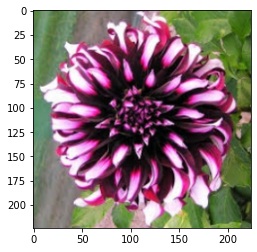

In [66]:
plt.imshow(mobi_x_test[0])
print(y_test[0])

In [76]:
test=mobi_x_test[0]
test.shape
test=test.reshape(1,224,224,3)
print(test.shape)

(1, 224, 224, 3)


In [77]:
with tf.device('/cpu:0'):
    pred=mobile_net_model.predict(test)

In [85]:
pred=pred.reshape(1)
pred=num.asarray(pred,dtype="int")
pred

array([0])

In [98]:
flower_test_path=r"C:\Users\user\Downloads\pansy_test2.0.jpg"
flower_test_sample=cv2.imread(flower_test_path)
flower_test_sample=cv2.resize(flower_test_sample,(224,224))
flower_test_sample=num.asarray(flower_test_sample,dtype="float64")
flower_test_sample=flower_test_sample/255.0

In [99]:
flower_test_sample=flower_test_sample.reshape(1,224,224,3)

In [101]:
#with tf.device('/cpu:0'):
pred_sample=mobile_net_model.predict(flower_test_sample)

In [102]:
pred_sample

array([[1.]], dtype=float32)